<h1>Когортный анализ</h1>

<h2>Задача:<br>используя выгрузку данных о пользовательских событиях, построить дневные когорты со средним количеством рекламных просмотров на пользователя</h2>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats as st
import random
import seaborn as sns
import statsmodels.stats.proportion as proportion
from datetime import datetime, date, time

from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import norm
import matplotlib.pyplot as plt


from tqdm.auto import tqdm
plt.style.use('ggplot')

In [3]:
# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)
 
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
 
# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

In [4]:
data = pd.read_csv('C:\\Users\\gatsko.veronika\\Desktop\\abt\\cohort_analysis.csv', sep=';')

In [6]:
data = data.rename(columns = {'2022-08-01': 'date_reg', '2022/08/01': 'date_event', '6,8': 'count'})

In [8]:
data.loc[len(data)] = ['2022-08-01', '2022-08-01', '6,8']

In [11]:
data['date_ragistration'] = data['date_reg']

In [14]:
data['date_reg'] = pd.to_datetime(data['date_reg'])
data['date_event'] = pd.to_datetime(data['date_event'])

In [15]:
data['count'] = data['count'].str.replace('[A-Za-z]', '').str.replace(',', '.').astype(float)

C:\Users\GATSKO~1.VER\AppData\Local\Temp/ipykernel_21340/1191173210.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['count'] = data['count'].str.replace('[A-Za-z]', '').str.replace(',', '.').astype(float)


In [17]:
data['lifetime'] = (data['date_event'] - data['date_reg']).dt.days

In [20]:
result_grouped = data.pivot_table(index = ['date_ragistration'], columns = 'lifetime', values = 'count')


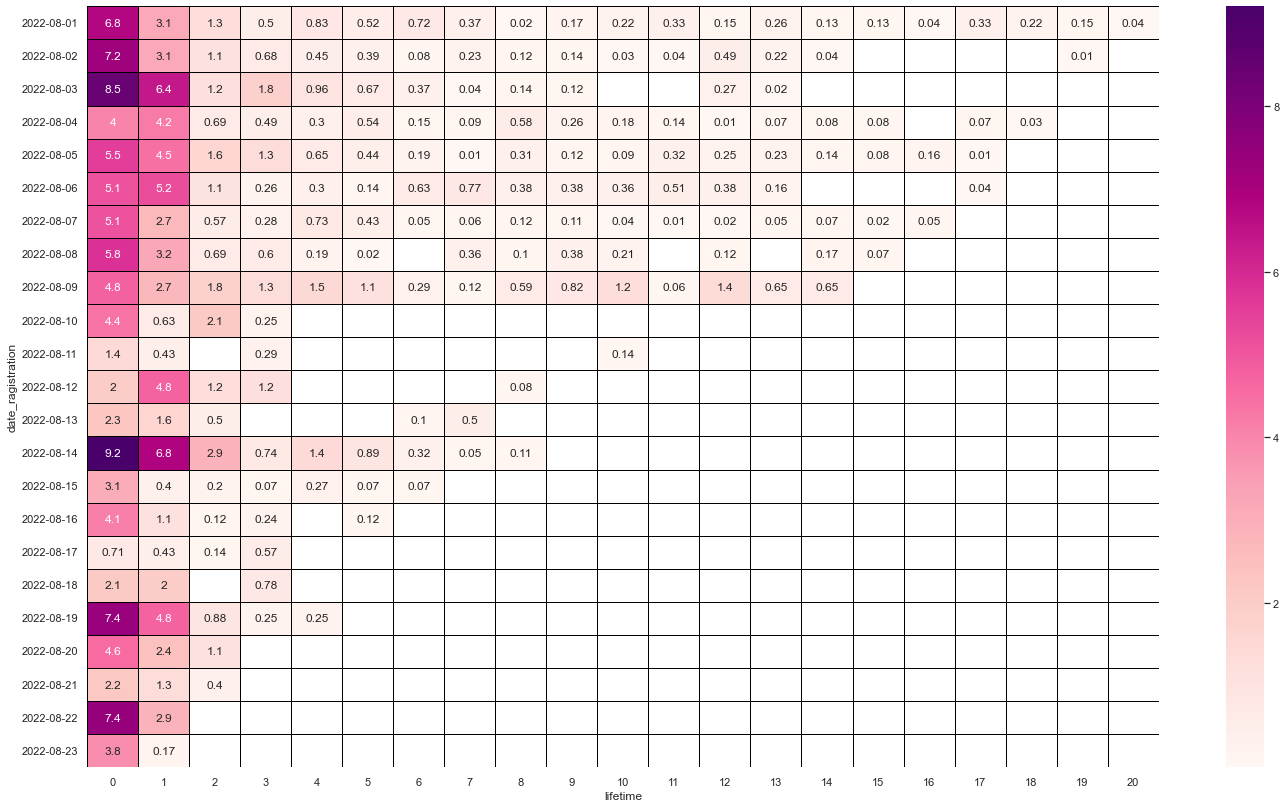

In [40]:
sns.set(style='whitegrid')
plt.figure(figsize=(24, 14))
sns.heatmap(result_grouped, annot=True, linewidths=1, linecolor='black',  cmap= 'RdPu');

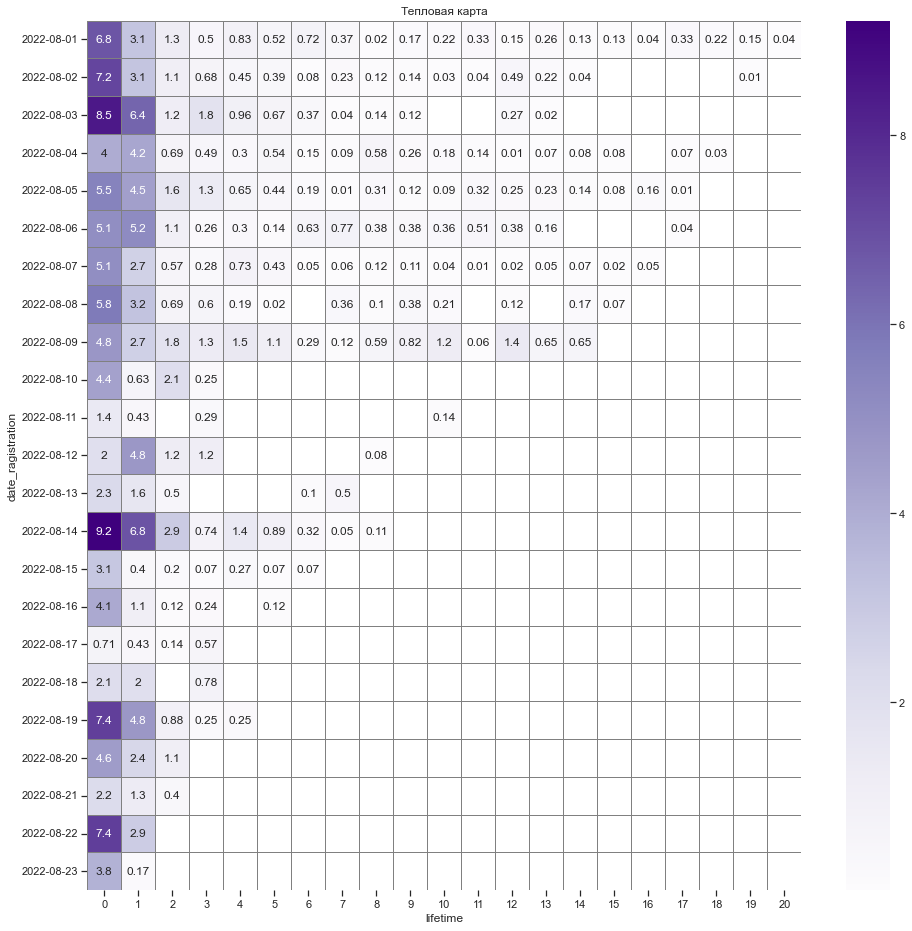

In [32]:
plt.figure(figsize=(16, 16))
plt.title('Тепловая карта')
sns.heatmap(result_grouped, cmap='Purples', linewidths=1, linecolor='gray', annot = True);
